## For this classification problem i am choosing the Breast cancer dataset from sklearn datasets for Medical diagnosis 



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. loading and splitting the dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 2. importing models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# 3. to get the mentioned metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Data Preparation

# Load the dataset (Classification: Malignant vs. Benign)
data = load_breast_cancer()
X = data.data
y = data.target

# Spliting the data into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data Loaded: {data.feature_names.shape[0]} features")
print(f"Training Samples: {X_train.shape[0]} | Test Samples: {X_test.shape[0]}\n")

Data Loaded: 30 features
Training Samples: 455 | Test Samples: 114



# 1. Tree-Based Models
(Note: Decision Trees were introduced in the previous exercise)

Implement three different tree-based classification models using scikit-learn:

Decision Tree Classifier

Random Forest Classifier

Gradient Boosted Trees Classifier

In [ ]:

#Tree-Based Models

# We define a dictionary of models to loop through easily
tree_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

model_results = []

for name, model in tree_models.items():
    # Fiting the model
    model.fit(X_train, y_train)
    # Generating predictions
    y_pred = model.predict(X_test)
    
    # Calculating metrics
    model_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# 2. K-Nearest Neighbors (KNN) Model
Implement the K-Nearest Neighbors (KNN) classifier

Test multiple values of k (e.g., k = 1 to 20)

Plot model performance against different k-values

Identify the optimal value of k

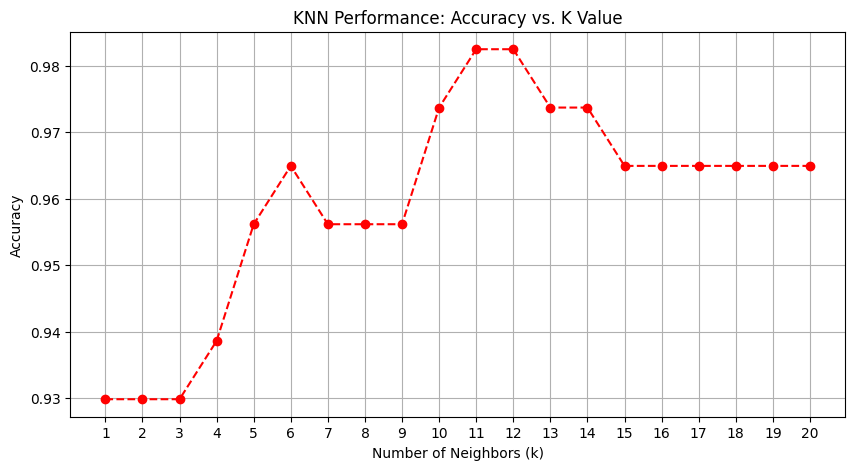

In [ ]:
# once we have the calculated metrics, we can plot the results using matplotlib

# KNN implementation
# Note: KNN uses distance, so scaling is usually recommended. 
# For this exercise, we use raw data as requested, and scale the data that improves KNN.

k_range = range(1, 21)
knn_scores = []

# Loop through k values 1 to 20
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    knn_scores.append(accuracy_score(y_test, y_pred_k))

# Identify optimal k
optimal_k = k_range[np.argmax(knn_scores)]
best_knn_accuracy = max(knn_scores)

# Plot KNN Performance
plt.figure(figsize=(10, 5))
plt.plot(k_range, knn_scores, marker='o', linestyle='--', color='red')
plt.title('KNN Performance: Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Train the final KNN model with the optimal k found
best_knn = KNeighborsClassifier(n_neighbors=optimal_k)
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

# Appending KNN results to the summary list
model_results.append({
    "Model": f"KNN (Optimal k={optimal_k})",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1-Score": f1_score(y_test, y_pred_knn)
})

# 3. Evaluation Metrics
Evaluate all models using the following metrics:

Accuracy

Precision

Recall

F1-score

Present the results in a clear table or summary.

In [6]:
summary_df = pd.DataFrame(model_results)
summary_df.set_index("Model", inplace=True)

# formatting for cleaner output
print("--- Final Model Performance Comparison ---")
print(summary_df.round(4))

--- Final Model Performance Comparison ---
                    Accuracy  Precision  Recall  F1-Score
Model                                                    
Decision Tree         0.9474     0.9577  0.9577    0.9577
Random Forest         0.9649     0.9589  0.9859    0.9722
Gradient Boosting     0.9561     0.9583  0.9718    0.9650
KNN (Optimal k=11)    0.9825     0.9726  1.0000    0.9861
KNN (Optimal k=11)    0.9825     0.9726  1.0000    0.9861
